In [1]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
dfDdos = pd.read_csv('/home/mak/mak/maths/MNAD/datasets/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX1.csv',encoding='utf-8')
dfPortScan = pd.read_csv('/home/mak/mak/maths/MNAD/datasets/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',encoding='utf-8')
dfFriWH = pd.read_csv('/home/mak/mak/maths/MNAD/datasets/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv',encoding='utf-8')
dfMonWH = pd.read_csv('/home/mak/mak/maths/MNAD/datasets/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv',encoding='utf-8')
dfThurWH = pd.read_csv('/home/mak/mak/maths/MNAD/datasets/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',encoding='utf-8')
dfThurWebAtt = pd.read_csv('/home/mak/mak/maths/MNAD/datasets/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',encoding='utf-8')
dfWedWh = pd.read_csv('/home/mak/mak/maths/MNAD/datasets/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv',encoding='utf-8')
dfTuesWH = pd.read_csv('/home/mak/mak/maths/MNAD/datasets/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv',encoding='utf-8')

In [3]:
dfDdos.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [4]:
print(dfDdos.shape)
print(dfPortScan.shape)
print(dfFriWH.shape)
print(dfMonWH.shape )
print(dfThurWH.shape )
print(dfThurWebAtt.shape)
print(dfWedWh.shape)
print( dfTuesWH.shape)
dfDdos.shape[0] + dfPortScan.shape[0]+ dfFriWH.shape[0] + dfMonWH.shape[0] + dfThurWH.shape[0] + dfThurWebAtt.shape[0] + dfWedWh.shape[0] + dfTuesWH.shape[0]

(225745, 79)
(286467, 79)
(191033, 79)
(529918, 79)
(288602, 79)
(170366, 79)
(692703, 79)
(445909, 79)


2830743

In [5]:
# dfDdos.
# dfPortScan.
# dfFriWH.
# dfMonWH.
# dfThurWH.
# dfThurWebAtt.
# dfWedWh.
# dfTuesWH.

In [6]:
new_df = pd.concat([dfDdos,dfPortScan])
new_df = pd.concat([new_df,dfFriWH])
new_df = pd.concat([new_df,dfMonWH])
new_df = pd.concat([new_df,dfThurWH])
new_df = pd.concat([new_df,dfThurWebAtt])
new_df = pd.concat([new_df, dfTuesWH])
new_df = pd.concat([new_df, dfWedWh])

new_df.shape

(2830743, 79)

In [13]:
new_df.head(15)
new_df.to_csv('all_data.csv', encoding='utf-8')

In [8]:
new_df.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,54871,1022,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,54925,4,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,54925,42,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,9282,4,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,55153,4,2,0,37,0,31,6,18.5,17.67767,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [9]:
new_df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [10]:
tag = new_df.groupby(' Label')[' Label'].agg('count')
tag

 Label
BENIGN                        2273097
Bot                              1966
DDoS                           128027
DoS GoldenEye                   10293
DoS Hulk                       231073
DoS Slowhttptest                 5499
DoS slowloris                    5796
FTP-Patator                      7938
Heartbleed                         11
Infiltration                       36
PortScan                       158930
SSH-Patator                      5897
Web Attack � Brute Force         1507
Web Attack � Sql Injection         21
Web Attack � XSS                  652
Name:  Label, dtype: int64

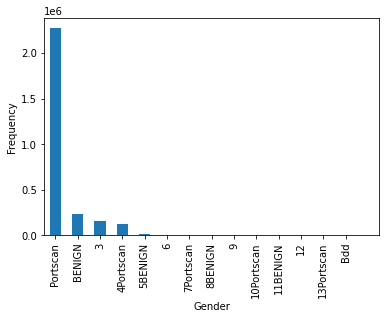

In [11]:
target = new_df[' Label']
target.value_counts().plot(kind='bar')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13], ['Portscan','BENIGN', '3', 
                                               '4Portscan','5BENIGN', '6',
                                               '7Portscan','8BENIGN', '9',
                                                '10Portscan','11BENIGN', '12', 
                                               '13Portscan','Bdd'
                                              
                                              ])
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y=le.fit_transform(target)

print(np.average(Y))
X=new_df.iloc[:,:-1]
X.astype(np.float32,copy=False)

X.drop(X.columns[14], axis=1,inplace=True)
X.drop(X.columns[14], axis=1,inplace=True)

print(X.shape)
X.dropna()
print(X.shape,np.max(np.max(X).astype(np.float32)))
count = -1
for i in np.max(X).astype(np.float32):
    count += 1
    print(count, '---',i)

1.0644173632152407
(2830743, 76)
(2830743, 76) 655453056.0
0 --- 65535.0
1 --- 120000000.0
2 --- 219759.0
3 --- 291922.0
4 --- 12900000.0
5 --- 655453056.0
6 --- 24820.0
7 --- 2325.0
8 --- 5940.85693359375
9 --- 7125.5966796875
10 --- 19530.0
11 --- 2896.0
12 --- 5800.5
13 --- 8194.66015625
14 --- 120000000.0
15 --- 84800264.0
16 --- 120000000.0
17 --- 120000000.0
18 --- 120000000.0
19 --- 120000000.0
20 --- 84602928.0
21 --- 120000000.0
22 --- 120000000.0
23 --- 120000000.0
24 --- 120000000.0
25 --- 84418016.0
26 --- 120000000.0
27 --- 120000000.0
28 --- 1.0
29 --- 0.0
30 --- 1.0
31 --- 0.0
32 --- 4644908.0
33 --- 5838440.0
34 --- 3000000.0
35 --- 2000000.0
36 --- 1448.0
37 --- 24820.0
38 --- 3337.142822265625
39 --- 4731.5224609375
40 --- 22400000.0
41 --- 1.0
42 --- 1.0
43 --- 1.0
44 --- 1.0
45 --- 1.0
46 --- 1.0
47 --- 1.0
48 --- 1.0
49 --- 156.0
50 --- 3893.333251953125
51 --- 5940.85693359375
52 --- 5800.5
53 --- 4644908.0
54 --- 0.0
55 --- 0.0
56 --- 0.0
57 --- 0.0
58 --- 0.0
59

In [13]:
np.random.seed(0)
#x_train, x_test, y_train, y_test = train_test_split(label_puts, target, test_size = 0.99, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)
print(x_train.shape,len(y_train),x_test.shape,len(y_test))
x_train.columns

(2264594, 76) 2264594 (566149, 76) 566149


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', ' Flow IAT Mean', ' Flow IAT Std',
       ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean',
       ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total',
       ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min',
       'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SYN Flag Count',

In [14]:
print('---------------------------Decision Tree CLassifier------------------')

---------------------------Decision Tree CLassifier------------------


In [16]:
print(x_train.shape, y_train.shape)
dtc = DecisionTreeClassifier(max_depth = 15)
dtc = dtc.fit(x_train,y_train)

In [17]:
y_pred = dtc.predict(x_test)
y_pred

array([ 0,  0,  4, ...,  0,  0, 10])

In [18]:
from sklearn.metrics import accuracy_score,f1_score
print(dtc.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.9975571801769498
0.9975571801769498
0.7598913238760986


In [ ]:
attributes = list(x_train)
sorted(zip(dtc.feature_importances_, attributes), reverse=True)

In [ ]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,100):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(x_train, y_train)
    train_accuracy.append(dt_model.score(x_train, y_train))
    validation_accuracy.append(dt_model.score(x_test, y_test))
print(len(train_accuracy))
print(len(validation_accuracy))
frame = pd.DataFrame({'max_depth':range(1,100), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of the tree')
plt.ylabel('performance')
plt.legend()

In [ ]:
attributes = list(x_train)
sorted(zip(dtc.feature_importances_, attributes), reverse=True)

In [ ]:
print('hi')

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(DecisionTreeClassifier(max_depth = 30),X,Y,cv=3)

In [ ]:
print('---------------------------Random Forest CLassifier------------------')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators =5)
model = model.fit(x_train, y_train)
rfy_pred = model.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(model.score(x_test,y_test))

In [ ]:
attributes = list(x_train)
sorted(zip(model.feature_importances_, attributes), reverse=True)

In [ ]:
print('---------------------------Random Forest Regressor------------------')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 5, random_state = 0)
# fit the regressor with x and y data
regressor.fit(x_train, y_train)  


In [ ]:
print(regressor.score(x_test, y_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))

In [ ]:
attributes = list(x_train)
sorted(zip(regressor.feature_importances_, attributes), reverse=True)

In [19]:
print('Extra Trees-------- For Feature selection-------------')

Extra Trees---------------------


In [20]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# # path = r'C:\Desktop\pima-indians-diabetes.csv'
# # names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# # dataframe = read_csv(data, names=names)
# # array = dataframe.value

# dtc = DecisionTreeClassifier(max_depth = 15)
# dtc = dtc.fit(x_train,y_train)
# # X = array[:,0:8]
# Y = array[:,8]

model = ExtraTreesClassifier()
model.fit(x_train,y_train)

[4.71710651e-02 1.52130730e-02 6.29487311e-03 6.84566129e-03
 4.55618523e-03 5.79419719e-03 8.79891752e-03 1.08344357e-02
 1.34891879e-02 9.43140084e-03 3.09719111e-02 3.23672433e-02
 3.08917470e-02 3.07383256e-02 8.72647362e-03 1.41399488e-02
 3.00517714e-02 5.50515937e-03 1.95741880e-02 1.17649262e-02
 2.65975661e-02 2.25762801e-02 6.92648922e-03 7.20202706e-03
 4.99862072e-03 4.43451567e-03 7.02813256e-03 2.29542992e-03
 4.34890045e-03 0.00000000e+00 3.25649825e-06 0.00000000e+00
 1.16428531e-02 7.81381685e-03 1.83113403e-02 4.88700140e-03
 1.73209525e-02 1.29595038e-02 2.74726761e-02 2.83066121e-02
 2.46380206e-02 9.06345158e-03 4.66848424e-03 3.66851145e-07
 6.69357369e-02 2.83393326e-02 1.07035933e-02 9.75849743e-06
 1.44788348e-06 1.34076294e-02 2.76519719e-02 6.93141585e-03
 3.29193516e-02 1.13676557e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.24441722e-02 5.48553304e-03 6.62333530e-03 6.13572612e-03
 3.18805271e-02 6.796059

In [21]:
attributes = list(x_train)
sorted(zip(model.feature_importances_, attributes), reverse=True)

[(0.06693573691020385, ' PSH Flag Count'),
 (0.047171065093585644, ' Destination Port'),
 (0.043531831730088975, ' min_seg_size_forward'),
 (0.03291935156510166, ' Avg Bwd Segment Size'),
 (0.03236724330999339, ' Bwd Packet Length Min'),
 (0.03188052712741721, 'Init_Win_bytes_forward'),
 (0.030971911063000523, 'Bwd Packet Length Max'),
 (0.030891746993524434, ' Bwd Packet Length Mean'),
 (0.030738325597946457, ' Bwd Packet Length Std'),
 (0.03005177143500033, ' Flow IAT Max'),
 (0.028339332561238235, ' ACK Flag Count'),
 (0.028306612055692276, ' Packet Length Std'),
 (0.027651971865009724, ' Average Packet Size'),
 (0.027472676100923254, ' Packet Length Mean'),
 (0.026597566138777506, ' Fwd IAT Std'),
 (0.02541652286603055, ' Idle Min'),
 (0.024638020604799873, ' Packet Length Variance'),
 (0.023145515569645555, 'Idle Mean'),
 (0.02257628007688521, ' Fwd IAT Max'),
 (0.02134429157608102, ' Idle Max'),
 (0.019574188047516042, 'Fwd IAT Total'),
 (0.018311340336690136, 'Fwd Packets/s'),
 

In [17]:
# print('------------Checking Individual Feature importance------')

------------Checking Individual Feature importance------


In [33]:
# df_some_rows = new_df[(new_df[' Label'] == 'DDoS')]
# df_some_rows

In [29]:
# le = LabelEncoder()
# target = df_some_rows[' Label']
# Y=le.fit_transform(target)

# print(np.average(Y))
# X=df_some_rows.iloc[:,:-1]
# X.astype(np.float32,copy=False)


# X.drop(X.columns[14], axis=1,inplace=True)
# X.drop(X.columns[14], axis=1,inplace=True)

# np.random.seed(0)
# #x_train, x_test, y_train, y_test = train_test_split(label_puts, target, test_size = 0.99, random_state = 42)
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)
# print(x_train.shape,len(y_train),x_test.shape,len(y_test))
# x_train.columns

0.0
(102421, 76) 102421 (25606, 76) 25606


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', ' Flow IAT Mean', ' Flow IAT Std',
       ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean',
       ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total',
       ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min',
       'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       'FIN Flag Count', ' SYN Flag Count',

In [32]:
# dtc = DecisionTreeClassifier(max_depth = 15)
# dtc = dtc.fit(x_train,y_train)
# y_pred = dtc.predict(x_test)
# # y_pred

# from sklearn.metrics import accuracy_score,f1_score
# print(dtc.score(x_test, y_test))
# print(accuracy_score(y_test, y_pred))
# print(f1_score(y_test, y_pred))

In [31]:
# attributes = list(x_train)
# sorted(zip(dtc.feature_importances_, attributes), reverse=True)

[(0.0, 'Total Length of Fwd Packets'),
 (0.0, 'Subflow Fwd Packets'),
 (0.0, 'Init_Win_bytes_forward'),
 (0.0, 'Idle Mean'),
 (0.0, 'Fwd Packets/s'),
 (0.0, 'Fwd PSH Flags'),
 (0.0, 'Fwd IAT Total'),
 (0.0, 'Fwd Avg Bytes/Bulk'),
 (0.0, 'FIN Flag Count'),
 (0.0, 'Bwd Packet Length Max'),
 (0.0, 'Bwd IAT Total'),
 (0.0, 'Bwd Avg Bulk Rate'),
 (0.0, 'Active Mean'),
 (0.0, ' min_seg_size_forward'),
 (0.0, ' act_data_pkt_fwd'),
 (0.0, ' URG Flag Count'),
 (0.0, ' Total Length of Bwd Packets'),
 (0.0, ' Total Fwd Packets'),
 (0.0, ' Total Backward Packets'),
 (0.0, ' Subflow Fwd Bytes'),
 (0.0, ' Subflow Bwd Packets'),
 (0.0, ' Subflow Bwd Bytes'),
 (0.0, ' SYN Flag Count'),
 (0.0, ' RST Flag Count'),
 (0.0, ' Packet Length Variance'),
 (0.0, ' Packet Length Std'),
 (0.0, ' Packet Length Mean'),
 (0.0, ' PSH Flag Count'),
 (0.0, ' Min Packet Length'),
 (0.0, ' Max Packet Length'),
 (0.0, ' Init_Win_bytes_backward'),
 (0.0, ' Idle Std'),
 (0.0, ' Idle Min'),
 (0.0, ' Idle Max'),
 (0.0, ' Fwd